In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('dataframe_.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


<AxesSubplot:xlabel='input'>

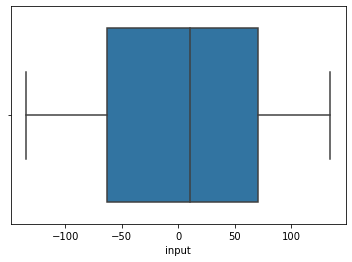

In [69]:
sns.boxplot(df['input'])

<AxesSubplot:xlabel='output'>

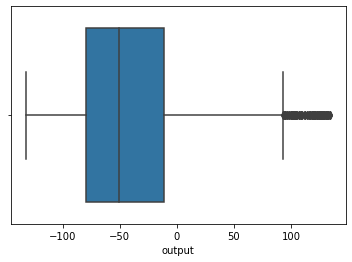

In [70]:
sns.boxplot(df['output'])

In [26]:
(df<0).sum().sum()# total number of negative values

2080

In [30]:
df_n=df[(df>0).all(1)]

In [31]:
df_n

,input,output
300,82.896050,1.467981
306,84.633331,7.000000
307,84.775244,8.755985
309,72.041717,11.947285
310,89.633331,18.000000
...,...,...
1539,93.633331,39.000000
1540,75.802308,48.028553
1541,87.325028,32.580658
1542,105.482733,52.557204


In [32]:
df_n.describe()# maximumm, minimum and mean are calculater after removing outlier and parameter tunning 

,input,output
count,340.000000,340.000000
mean,102.645862,66.137065
std,16.540564,38.879872
min,58.916087,0.842715
25%,90.633331,31.986850
50%,104.361054,63.128500
75%,114.574354,100.609812
max,134.605775,134.425495


In [75]:
df_new=df_n

In [76]:
df_new.describe()

,input,output
count,340.000000,340.000000
mean,102.645862,66.137065
std,16.540564,38.879872
min,58.916087,0.842715
25%,90.633331,31.986850
50%,104.361054,63.128500
75%,114.574354,100.609812
max,134.605775,134.425495


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

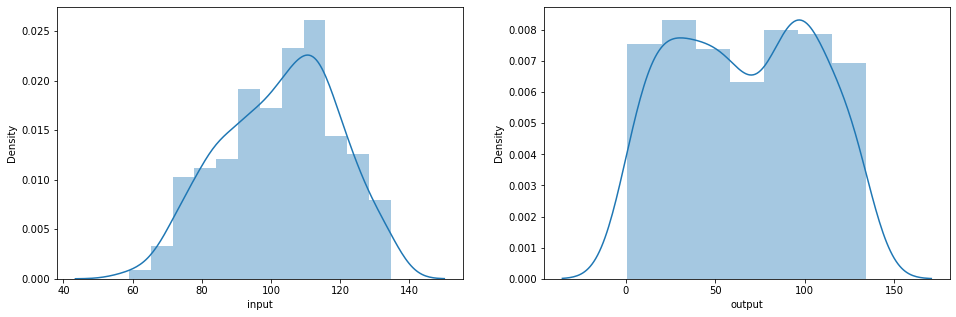

In [80]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_new['input'])
plt.subplot(1,2,2)
sns.distplot(df_new['output'])
plt.show()

In [84]:
df_new['input'].skew()


-0.22577301241564285

In [85]:
df_new['output'].skew()

0.004535677142700942

<AxesSubplot:xlabel='input'>

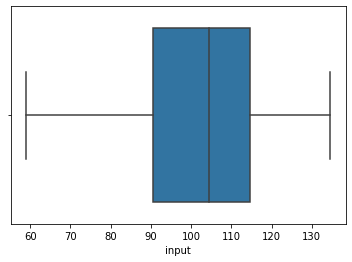

In [86]:
sns.boxplot(df_new['input'])

<AxesSubplot:xlabel='output'>

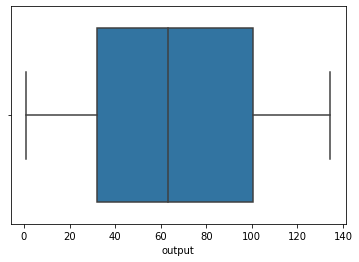

In [87]:
sns.boxplot(df_new['output'])

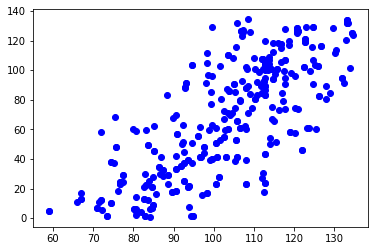

In [113]:
X=df_new['input']
y=df_new['output']
plt.scatter(x,y,color='b')

In [122]:
X = df_new.iloc[:, :-1].values  
y = df_new.iloc[:, 1].values  
print(X)
print(y)

[[ 82.89604966]
 [ 84.6333313 ]
 [ 84.77524438]
 [ 72.04171715]
 [ 89.6333313 ]
 [ 91.84910437]
 [ 76.65852087]
 [ 86.2740089 ]
 [ 92.6333313 ]
 [ 93.54570014]
 [ 90.57672233]
 [101.2707346 ]
 [ 96.6333313 ]
 [100.4674643 ]
 [ 96.08331355]
 [ 85.24119004]
 [100.6333313 ]
 [ 83.67882714]
 [105.8866071 ]
 [119.0248458 ]
 [102.6333313 ]
 [112.6598778 ]
 [115.4332941 ]
 [103.0789271 ]
 [106.6333313 ]
 [122.0154499 ]
 [103.5799233 ]
 [ 90.82227294]
 [112.6333313 ]
 [ 93.19808183]
 [110.1351971 ]
 [126.25779   ]
 [112.6333313 ]
 [114.2310589 ]
 [112.0880697 ]
 [ 94.668251  ]
 [114.6333313 ]
 [103.6168168 ]
 [108.1348708 ]
 [131.90958   ]
 [115.6333313 ]
 [122.3210184 ]
 [105.0756003 ]
 [103.8184685 ]
 [117.6333313 ]
 [126.5716611 ]
 [111.921765  ]
 [112.5890501 ]
 [122.6333313 ]
 [120.5892044 ]
 [122.6333313 ]
 [134.4631809 ]
 [125.91664   ]
 [133.1015146 ]
 [124.6333313 ]
 [121.0600756 ]
 [133.0240344 ]
 [106.7891091 ]
 [ 58.9160873 ]
 [ 71.03641899]
 [ 74.34604263]
 [ 66.88622905]
 [ 80.63

In [123]:
# Split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
#test size= 0.2 means it is of 80% train data and 20% test data 
print("Train-Test split done ")

Train-Test split done 


In [124]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 

regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


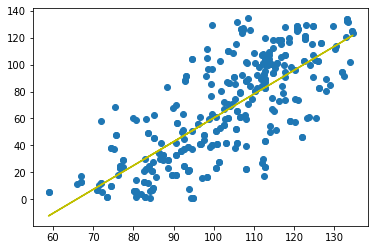

In [125]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
#plotting scatter plot between x , y i.e input and output data set
plt.plot(X, line,'y')
#plotting line of linear regression
plt.show()

In [126]:
# MAKING PREDICTION
print(X_test) # Testing data 
y_pred = regressor.predict(X_test) # Predicting the scores

[[ 99.68624243]
 [ 83.67882714]
 [ 82.84174354]
 [102.6333313 ]
 [111.921765  ]
 [100.8818575 ]
 [ 85.24119004]
 [122.0154499 ]
 [ 82.6333313 ]
 [ 93.19808183]
 [ 75.45194237]
 [ 79.80685918]
 [ 80.21419524]
 [ 71.03641899]
 [ 73.46537222]
 [132.9749039 ]
 [103.5799233 ]
 [ 71.90404034]
 [ 94.82477999]
 [103.6168168 ]
 [118.6333313 ]
 [ 97.08220181]
 [120.898186  ]
 [121.0600756 ]
 [114.5734398 ]
 [112.6333313 ]
 [124.6333313 ]
 [109.5425747 ]
 [ 99.6333313 ]
 [106.7891091 ]
 [ 84.6333313 ]
 [112.0880697 ]
 [108.6333313 ]
 [ 90.6333313 ]
 [124.4528335 ]
 [116.6333313 ]
 [106.6333313 ]
 [ 99.33809238]
 [ 86.2740089 ]
 [ 80.21419524]
 [112.138167  ]
 [125.91664   ]
 [ 74.34604263]
 [133.0240344 ]
 [106.6333313 ]
 [ 77.46032343]
 [120.6333313 ]
 [ 92.6333313 ]
 [111.9169776 ]
 [112.6598778 ]
 [ 88.6333313 ]
 [ 90.6333313 ]
 [109.0853089 ]
 [120.5892044 ]
 [105.0756003 ]
 [117.7568023 ]
 [122.3210184 ]
 [ 82.6333313 ]
 [ 86.2740089 ]
 [ 76.65852087]
 [114.2310589 ]
 [115.0005466 ]
 [115.43

In [127]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,96.379324,59.887879
1,49.127977,31.532635
2,29.679876,30.049841
3,55.000000,65.108299
4,107.292979,81.561661
...,...,...
63,115.367603,70.276118
64,1.493731,13.440707
65,134.425495,75.347478
66,21.000000,33.223427


In [129]:
#EVALUATING THE MODEL
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('r2 Score :',regressor.score(X,y))

Mean Absolute Error: 21.216330760898362
r2 Score : 0.578722686210376
